In [ ]:
!pip install seaborn
!pip install imblearn
!pip install boto3

# Imports

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import boto3, os


BUCKET = os.getenv("AWS_S3_BUCKET")
HTTP = 'http://'
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")
REGIONNAME = os.getenv("AWS_DEFAULT_REGION")
AWS_S3_ENDPOINT = os.getenv("AWS_S3_ENDPOINT")


# Lectura de los datos

In [177]:
s3 = boto3.resource('s3',endpoint_url = AWS_S3_ENDPOINT +":9000",aws_access_key_id=AWS_ACCESS_KEY_ID,aws_secret_access_key=AWS_SECRET_ACCESS_KEY)
s3.Bucket('model-data').download_file('UNSW-NB15_1.csv','./data/UNSW-NB15_1.csv')

data_set = pd.read_csv('./data/UNSW-NB15_1.csv', sep=',', encoding='utf-8', names=['srip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeanzs', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'st_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label'],low_memory=False)

/var/folders/x_/c7lz775j7fs6dgdjn5h_dn440000gn/T/ipykernel_44858/4079582392.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data_set = pd.read_csv('../data/UNSW-NB15_1.csv', sep=',', encoding='utf-8', names=['srip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'stime', 'ltime', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'st_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label'])


In [178]:
data_set.shape

(700001, 49)

In [179]:
data_set.head()

,srip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,st_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


# Perfilamiento de los datos

In [180]:
data_set.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,st_dst_sport_ltm,ct_dst_src_ltm,label
count,700001.000000,7.000010e+05,7.000010e+05,700001.000000,700001.000000,700001.000000,700001.000000,7.000010e+05,7.000010e+05,700001.000000,...,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000,700001.000000
mean,0.863391,5.009637e+03,4.833038e+04,38.513848,31.980783,6.330444,21.326271,6.024271e+06,3.011023e+06,41.746643,...,0.019623,0.031116,6.380239,6.034169,4.153233,4.668593,1.685498,1.401911,2.188105,0.031736
std,25.935765,4.489868e+04,1.860516e+05,39.996956,30.450757,18.855979,64.733376,5.181492e+07,4.499952e+06,80.198729,...,0.138700,0.278212,5.075147,4.635608,3.740439,4.189667,1.871052,1.426013,2.211199,0.175296
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.003931,4.240000e+02,3.040000e+02,31.000000,29.000000,0.000000,0.000000,7.885915e+04,7.640437e+04,4.000000,...,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,0.027594,2.024000e+03,3.380000e+03,31.000000,29.000000,4.000000,5.000000,5.362718e+05,6.686759e+05,16.000000,...,0.000000,0.000000,5.000000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,0.000000
75%,0.346518,3.806000e+03,2.243200e+04,31.000000,29.000000,7.000000,16.000000,1.078489e+06,3.856223e+06,52.000000,...,0.000000,0.000000,9.000000,8.000000,5.000000,6.000000,2.000000,1.000000,3.000000,0.000000
max,8786.637695,1.367739e+07,1.465542e+07,255.000000,254.000000,5096.000000,5483.000000,5.268000e+09,1.287619e+08,10200.000000,...,1.000000,8.000000,44.000000,42.000000,42.000000,50.000000,36.000000,34.000000,38.000000,1.000000


In [181]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   srip               700001 non-null  object 
 1   sport              700001 non-null  object 
 2   dstip              700001 non-null  object 
 3   dsport             700001 non-null  object 
 4   proto              700001 non-null  object 
 5   state              700001 non-null  object 
 6   dur                700001 non-null  float64
 7   sbytes             700001 non-null  int64  
 8   dbytes             700001 non-null  int64  
 9   sttl               700001 non-null  int64  
 10  dttl               700001 non-null  int64  
 11  sloss              700001 non-null  int64  
 12  dloss              700001 non-null  int64  
 13  service            700001 non-null  object 
 14  sload              700001 non-null  float64
 15  dload              700001 non-null  float64
 16  sp

In [182]:
data_set['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis'], dtype=object)

In [183]:
data_set['attack_cat'].value_counts(normalize=True) * 100

attack_cat
Generic           33.860005
Exploits          24.348413
 Fuzzers          22.736889
Reconnaissance     7.918073
DoS                5.253207
Backdoors          2.403781
Analysis           2.367770
Shellcode          1.003826
Worms              0.108035
Name: proportion, dtype: float64

In [184]:
data_set['attack_cat'] = data_set['attack_cat'].replace(np.nan, "Normal")

In [185]:
data_set['attack_cat'].value_counts(normalize=True) * 100

attack_cat
Normal            96.826433
Generic            1.074570
Exploits           0.772713
 Fuzzers           0.721570
Reconnaissance     0.251285
DoS                0.166714
Backdoors          0.076286
Analysis           0.075143
Shellcode          0.031857
Worms              0.003429
Name: proportion, dtype: float64

In [186]:
attacks = ['Normal', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance']

In [187]:
data_set = data_set[data_set['attack_cat'].isin(attacks)]
data_set = data_set.drop('srip',axis=1)
data_set = data_set.drop('sport',axis=1)
data_set = data_set.drop('dstip',axis=1)
data_set = data_set.drop('dsport',axis=1)
data_set = data_set.drop('stime',axis=1)
data_set = data_set.drop('ltime',axis=1)
data_set = data_set.drop('attack_cat',axis=1)

In [188]:
data_set["proto"].unique()
arr = ['udp', 'arp', 'tcp', 'ospf', 'icmp', 'igmp', 'sctp', 'udt', 'sep',
       'swipe', 'sun-nd', 'mobile', 'pim', 'rtp', 'ip', 'ipnip', 'ggp',
       'st2', 'egp', 'cbt', 'emcon', 'igp', 'xnet', 'nvp', 'argus',
       'bbn-rcc', 'chaos', 'pup', 'hmp', 'mux', 'dcn', 'prm', 'trunk-1',
       'xns-idp', 'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4',
       'netblt', 'mfe-nsp', 'merit-inp', '3pc', 'idpr', 'xtp', 'tp++',
       'ddp', 'idpr-cmtp', 'ipv6', 'il', 'idrp', 'ipv6-frag', 'sdrp',
       'ipv6-route', 'gre', 'rsvp', 'mhrp', 'bna', 'esp', 'i-nlsp',
       'narp', 'ipv6-no', 'tlsp', 'skip', 'ipv6-opts', 'any', 'cftp',
       'sat-expak', 'kryptolan', 'rvd', 'ippc', 'sat-mon', 'ipcv', 'visa',
       'cpnx', 'cphb', 'wsn', 'pvp', 'br-sat-mon', 'wb-mon', 'wb-expak',
       'iso-ip', 'secure-vmtp', 'vmtp', 'vines', 'ttp', 'nsfnet-igp',
       'dgp', 'tcf', 'eigrp', 'sprite-rpc', 'larp', 'mtp', 'ax.25',
       'ipip', 'micp', 'aes-sp3-d', 'encap', 'etherip', 'pri-enc', 'gmtp',
       'pnni', 'ifmp', 'aris', 'qnx', 'a/n', 'scps', 'compaq-peer',
       'ipcomp', 'snp', 'ipx-n-ip', 'vrrp', 'zero', 'pgm', 'iatp', 'ddx',
       'l2tp', 'srp', 'stp', 'smp', 'uti', 'sm', 'ptp', 'crtp', 'isis',
       'fire', 'crudp', 'sccopmce', 'pipe', 'sps', 'iplt', 'unas', 'fc',
       'ib']
arr2 = []
for i in range(0,135):
    arr2.append(i)
    
data_set['proto'] = data_set['proto'].replace(arr,arr2)

data_set["state"].unique()
arr = ['CON', 'INT', 'FIN', 'URH', 'REQ', 'ECO', 'RST', 'CLO', 'TXD',
       'URN', 'no', 'ACC', 'PAR', 'MAS', 'TST', 'ECR']
arr2 = []

for i in range(0,len(arr)):
    arr2.append(i)
data_set["state"] = data_set['state'].replace(arr,arr2)

arr = ['dns', '-', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3',
       'snmp', 'ssl', 'irc', 'radius', 'dhcp']

arr2=[]
for i in range(0,len(arr)):
    arr2.append(i)
data_set["service"] = data_set['service'].replace(arr,arr2)

/var/folders/x_/c7lz775j7fs6dgdjn5h_dn440000gn/T/ipykernel_44858/1217660359.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_set['proto'] = data_set['proto'].replace(arr,arr2)
/var/folders/x_/c7lz775j7fs6dgdjn5h_dn440000gn/T/ipykernel_44858/1217660359.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_set["state"] = data_set['state'].replace(arr,arr2)
/var/folders/x_/c7lz775j7fs6dgdjn5h_dn440000gn/T/ipykernel_44858/1217660359.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

In [189]:
corr=data_set.corr()
corr.to_csv('corr.csv')

<Axes: >

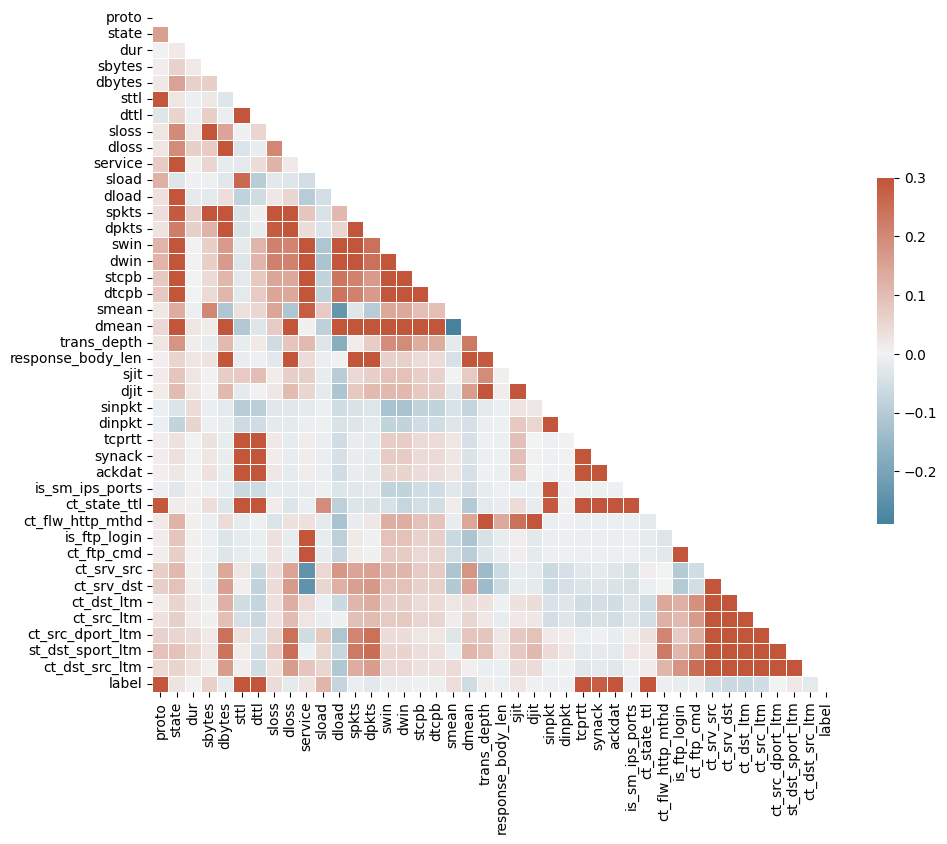

In [190]:
mask = np.triu(np.ones_like(corr, dtype=bool))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [191]:
data_set.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,st_dst_sport_ltm,ct_dst_src_ltm,label
0,0,0,0.001055,132,164,31,29,0,0,0,...,0,0,3,7,1,3,1,1,1,0
1,0,0,0.036133,528,304,31,29,0,0,1,...,0,0,2,4,2,3,1,1,2,0
2,0,0,0.001119,146,178,31,29,0,0,0,...,0,0,12,8,1,2,2,1,1,0
3,0,0,0.001209,132,164,31,29,0,0,0,...,0,0,6,9,1,1,1,1,1,0
4,0,0,0.001169,146,178,31,29,0,0,0,...,0,0,7,9,1,1,1,1,1,0


In [192]:
data_set.dtypes

proto                  int64
state                  int64
dur                  float64
sbytes                 int64
dbytes                 int64
sttl                   int64
dttl                   int64
sloss                  int64
dloss                  int64
service                int64
sload                float64
dload                float64
spkts                  int64
dpkts                  int64
swin                   int64
dwin                   int64
stcpb                  int64
dtcpb                  int64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
sjit                 float64
djit                 float64
sinpkt               float64
dinpkt               float64
tcprtt               float64
synack               float64
ackdat               float64
is_sm_ips_ports        int64
ct_state_ttl           int64
ct_flw_http_mthd       int64
is_ftp_login           int64
ct_ftp_cmd             int64
ct_srv_src    

In [193]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686121 entries, 0 to 700000
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   proto              686121 non-null  int64  
 1   state              686121 non-null  int64  
 2   dur                686121 non-null  float64
 3   sbytes             686121 non-null  int64  
 4   dbytes             686121 non-null  int64  
 5   sttl               686121 non-null  int64  
 6   dttl               686121 non-null  int64  
 7   sloss              686121 non-null  int64  
 8   dloss              686121 non-null  int64  
 9   service            686121 non-null  int64  
 10  sload              686121 non-null  float64
 11  dload              686121 non-null  float64
 12  spkts              686121 non-null  int64  
 13  dpkts              686121 non-null  int64  
 14  swin               686121 non-null  int64  
 15  dwin               686121 non-null  int64  
 16  stcpb  

#  Resolviendo el oversampling y dividiendo el dataset en el de entrenamiento y el de testing

In [194]:
!pip3 install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [229]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686121 entries, 0 to 686120
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   proto              686121 non-null  float64
 1   state              686121 non-null  float64
 2   dur                686121 non-null  float64
 3   sbytes             686121 non-null  float64
 4   dbytes             686121 non-null  float64
 5   sttl               686121 non-null  float64
 6   dttl               686121 non-null  float64
 7   sloss              686121 non-null  float64
 8   dloss              686121 non-null  float64
 9   service            686121 non-null  float64
 10  sload              686121 non-null  float64
 11  dload              686121 non-null  float64
 12  spkts              686121 non-null  float64
 13  dpkts              686121 non-null  float64
 14  swin               686121 non-null  float64
 15  dwin               686121 non-null  float64
 16  st

In [195]:
from imblearn.over_sampling import RandomOverSampler
import sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit(data_set)
data_set_x = scaled.transform(data_set)

data_set = pd.DataFrame(data=data_set_x, columns=['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'inpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'st_dst_sport_ltm', 'ct_dst_src_ltm', 'label'])

Y = data_set["label"]
X = data_set.drop(columns=["label"])


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=53, shuffle=True)




ros = RandomOverSampler(random_state=53)
X_train, y_train = ros.fit_resample(X_train, y_train)
y_train.value_counts(normalize=True)








label
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

In [196]:
X_train.describe()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,st_dst_sport_ltm,ct_dst_src_ltm
count,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,...,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06,1.084412e+06
mean,7.200436e-02,1.038359e-01,1.344488e-04,1.277032e-03,2.520461e-03,4.133649e-01,4.003148e-01,1.939719e-03,2.994488e-03,1.261079e-01,...,3.895250e-03,1.255335e-02,2.309547e-03,9.787312e-02,8.929429e-02,5.033268e-02,5.401381e-02,1.854530e-02,1.481529e-02,2.595939e-02
std,2.164875e-01,5.019861e-02,1.738549e-03,2.000261e-02,1.644923e-02,3.904995e-01,4.325278e-01,2.007127e-02,1.602965e-02,1.116016e-01,...,1.740499e-02,1.113363e-01,2.579130e-02,1.183756e-01,1.140780e-01,7.711438e-02,7.403614e-02,4.946711e-02,4.570808e-02,5.318519e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.492537e-02,6.666667e-02,2.015561e-07,2.339627e-05,1.214568e-05,1.215686e-01,1.141732e-01,0.000000e+00,0.000000e+00,8.333333e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.492537e-02,1.333333e-01,2.019066e-05,7.574543e-05,1.113581e-04,2.431373e-01,1.141732e-01,3.924647e-04,3.647638e-04,8.333333e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,4.651163e-02,4.878049e-02,2.439024e-02,2.040816e-02,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.492537e-02,1.333333e-01,1.077504e-04,2.162693e-04,6.938049e-04,9.960784e-01,9.921260e-01,1.373626e-03,1.459055e-03,1.666667e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,1.627907e-01,1.463415e-01,7.317073e-02,8.163265e-02,0.000000e+00,0.000000e+00,2.702703e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,9.166168e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.236656e-01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [197]:
Y.value_counts(normalize=True)

label
0.0    0.987852
1.0    0.012148
Name: proportion, dtype: float64

# Analisis de eliminacion de variables

In [198]:
from sklearn import feature_selection
selector = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=4).fit(X_train, y_train)
features=list(X.columns)
print(features)

['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'inpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'st_dst_sport_ltm', 'ct_dst_src_ltm']


In [199]:
selector.get_support()

array([False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False])

In [200]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=500)
rfe = feature_selection.RFE(model, step=40)
fit = rfe.fit(X_train,y_train)

In [201]:
print("Selected Features: %s" % fit.support_)

Selected Features: [ True  True False False False  True  True False False  True False False
 False False  True  True False False False  True  True False False False
  True False  True  True False  True  True False False False  True  True
  True False  True  True  True]


In [202]:

print("Feature Ranking: %s" % fit.ranking_)

Feature Ranking: [1 1 2 2 2 1 1 2 2 1 2 2 2 2 1 1 2 2 2 1 1 2 2 2 1 2 1 1 2 1 1 2 2 2 1 1 1
 2 1 1 1]


In [203]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DecisionTree

parameters={"splitter":["best"],
           "max_depth" : [1,5,9,11],
          "min_samples_leaf":[1,3,5,7,9],
          "min_weight_fraction_leaf":[0.1,0.3,0.5],
          "max_features":["auto","log2"],
          "max_leaf_nodes":[10,30,50,70,90]}

gs = GridSearchCV(DecisionTree(), parameters, n_jobs=2, scoring="accuracy")
gs_result = gs.fit(X_train, y_train)





/Users/davidfonseca/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/davidfonseca/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1500 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/davidfonseca/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_

In [204]:
gs_result.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [205]:
gs_result.best_score_

0.9944670470524409

In [216]:
model = DecisionTree(random_state=0,max_depth=9, max_features='log2', max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter='best')

In [217]:
from datetime import datetime
start_time = datetime.now()
model = model.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.607236


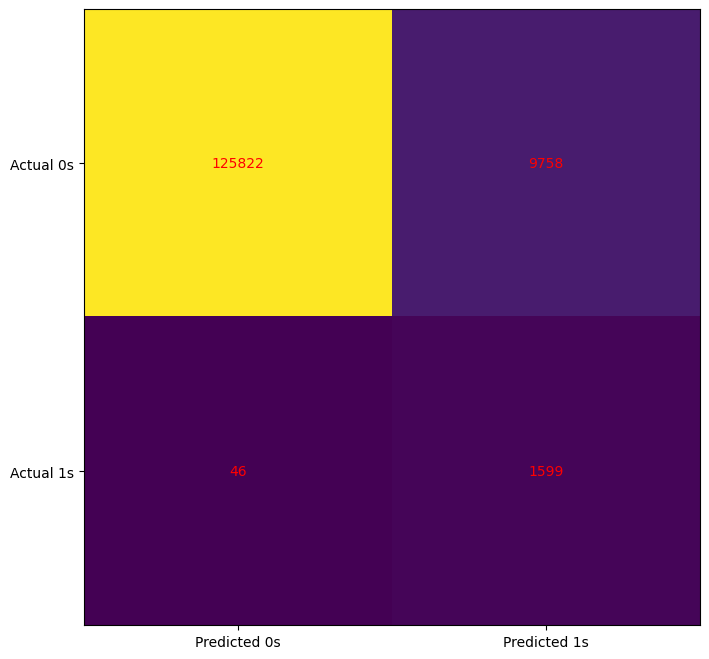

In [218]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [220]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    135580
         1.0       0.14      0.97      0.25      1645

    accuracy                           0.93    137225
   macro avg       0.57      0.95      0.60    137225
weighted avg       0.99      0.93      0.95    137225



In [221]:
from sklearn.metrics import accuracy_score, average_precision_score, precision_score, recall_score
y_predicted = model.predict(X_test)

In [222]:
print('accuracy: ', accuracy_score(y_test,y_predicted))

accuracy:  0.9285552924029878


In [223]:
print('avg precision: ', average_precision_score(y_test, y_predicted))

avg precision:  0.13719233679751383


In [224]:
print('precision: ' , precision_score(y_test, y_predicted))

precision:  0.1407942238267148


In [225]:
print('recall: ' ,recall_score(y_test, y_predicted))

recall:  0.9720364741641337


In [227]:
from sklearn.pipeline import Pipeline
model = Pipeline([('scaler', scaled), ('tree', model)])
joblib.dump(model, './model/classificationTree.pkl')

s3 = boto3.resource('s3',endpoint_url = AWS_S3_ENDPOINT + ":9000",
                    aws_access_key_id=AWS_ACCESS_KEY_ID,
                    aws_secret_access_key=AWS_SECRET_ACCESS_KEY)
 
s3.Bucket(BUCKET).upload_file('./model/classificationTree.pkl', 'classificationTree.pkl')

['../model/classificationTree.pkl']